# tinyurl.com/ANLPcolab1part2


Go to "File" -> "Save a Copy in Drive..."
This lets you create your own copy of the notebook in your Google drive, and any changes you make doesn't impact the shared notebook

## Basic text analysis using Python

The first step is to install the required libraries using the pip command (if you don't have them), and import the modules from the libraries.



In [ ]:
#Enable plots to be displayed in the notebook
# %matplotlib inline

# !pip install seaborn

import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Mounting the drive

In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive. You must allow access to your drive by signing in to your Google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the dataset from here: https://drive.google.com/file/d/1qAC9x-WMwzofyG8l1fFUoHwWhk3n61fp/view?usp=sharing

Then, copy it to your Google drive folder which contains the notebook

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive/Data Science/Spring 2024/ANLP/Week 1"

CNN_Articles_2021-2023.csv


## Reading Data from a CSV File

To read the data from the input csv file from my Google drive and store it as a Python dataframe, I use the read_csv() function from Pandas. You have to change the folder location to where the file is stored in your own Gdrive - mine is in this path:
/content/drive/My Drive/Colab Notebooks/ANLP 2024 Colab Notebooks/CNN_Articles_2021-2023.csv

You can read about the different functions and their input parameters in the  documentation for the library:
[Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

**Note:** Comment code below if you are not importing from your Gdrive folder



In [ ]:
#The input csv file is a subset of the data from https://github.com/hadasu/CNN_web_crawler
newsdf = pd.read_csv('/content/drive/My Drive/Data Science/Spring 2024/ANLP/Week 1/CNN_Articles_2021-2023.csv',encoding='unicode_escape')

## Reading input file from a url
The alternative option is to read in the CSV from a web url (on github) and store it in a dataframe. This is a smaller dataset containing articles only from 2021 January to March.


In [ ]:
url = 'https://github.com/AntonetteShibani/NLPAnalysis/blob/main/CNN_Articles_2021.csv?raw=true'
newsdf = pd.read_csv(url)

## Preliminary data inspection

We usually try to get a a sense of the data first (particularly useful for large data sets where opening in other UI based tools is not easy)

In [ ]:
#Print general information about a DataFrame including the index dtype and columns, non-null values and memory usage
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1708 non-null   int64 
 1   author                1708 non-null   object
 2   date_published        1708 non-null   object
 3   part_of               1708 non-null   object
 4   article_section       1708 non-null   object
 5   url                   1708 non-null   object
 6   headline              1708 non-null   object
 7   description           1708 non-null   object
 8   keywords              1708 non-null   object
 9   alternative_headline  1708 non-null   object
 10  text                  1708 non-null   object
dtypes: int64(1), object(10)
memory usage: 146.9+ KB


In [ ]:
newsdf.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [ ]:
#Generate descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset’s distribution
newsdf.describe()

,ID
count,1708.000000
mean,20285.044496
std,16894.328739
min,157.000000
25%,5544.250000
50%,10812.500000
75%,41309.250000
max,43956.000000


In [ ]:
# Use the .head(n) function to look at the first 'n' rows of our news dataframe. The default n is 5, we are now changing it to view the first 10 rows
newsdf.head(10)


,ID,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
0,157,"Analysis by Daniel Dale, CNN",2021-03-03 01:33:41+00:00,politics,politics,https://www.cnn.com/2021/03/02/politics/fact-c...,Anatomy of a lie: How the myth that Antifa sto...,"Despite numerous debunkings, the lie that Anti...","politics, Anatomy of a lie: How the myth that ...",Anatomy of a lie: How the myth that Antifa sto...,Washington (CNN)FBI Director Christopher Wray ...
1,371,"Ben Church, CNN",2021-03-19 10:23:09+00:00,sport,sport,https://www.cnn.com/2021/03/19/sport/black-ice...,Black Ice film aiming to boost diversity in cl...,Whether it's a comment about his hair or quest...,"sport, Black Ice film aiming to boost diversit...",'It was super cool just having that much melan...,(CNN)Whether it's a comment about his hair or...
2,377,"Ben Church, CNN",2021-02-02 09:28:27+00:00,sport,sport,https://www.cnn.com/2021/02/02/sport/slovenia-...,Slovenia chimney climb: Janja Garnbret and Dom...,Climbers Janja Garnbret and Domen Škofic scale...,"sport, Slovenia chimney climb: Janja Garnbret ...",'The most special thing I've done': Two world-...,"(CNN)Soaring 360 meters into the sky, the Trb..."
3,399,"Ben Church, CNN",2021-03-12 11:59:44+00:00,sport,sport,https://www.cnn.com/2021/03/12/sport/esports-l...,Team Liquid: How esports has helped its fans g...,The return of sport amid the pandemic has been...,"sport, Team Liquid: How esports has helped its...",'They are like a family': How esports has help...,(CNN)The return of sport amid the pandemic ha...
4,480,"Ashley Vaughan, CNN",2021-03-05 20:04:31+00:00,news,us,https://www.cnn.com/2021/03/05/us/how-to-suppo...,Attacks against Asian Americans are on the ris...,"""We're just tired,"" Will Lex Ham of New York C...","us, Attacks against Asian Americans are on the...",Attacks against Asian Americans are on the ris...,"(CNN)""We're just tired,"" Will Lex Ham of New ..."
5,510,"Samantha Bresnahan, CNN",2021-03-08 02:09:30+00:00,news,africa,https://www.cnn.com/2021/03/07/africa/south-af...,These women are shaping the future of African ...,"In celebration of International Women's Day, m...","africa, These women are shaping the future of ...",These women are shaping the future of African ...,"(CNN)In the heart of Cape Town, a control roo..."
6,511,"Aisha Salaudeen and Robert Howell, CNN",2021-01-08 09:09:05+00:00,news,africa,https://www.cnn.com/2021/01/08/africa/nigeria-...,Nigeria's 'techpreneurs' are using technology ...,Meet the startup founders from Co-Creation Hub...,"africa, Nigeria's 'techpreneurs' are using tec...",Nigeria's 'techpreneurs' are using technology ...,"Lagos, Nigeria (CNN)As recently as 10 years ag..."
7,548,"Jennifer Gray, CNN Meteorologist",2021-02-08 18:44:27+00:00,news,weather,https://www.cnn.com/2021/02/08/weather/how-to-...,How to survive an avalanche - CNN,Avalanches can occur any month of the year and...,"weather, How to survive an avalanche - CNN",How to avoid avalanches and what to do if you'...,(CNN)It has been a deadly week in the US from...
8,567,"Story by Drew Kann. Graphics by Renée Rigdon, CNN",2021-02-22 10:45:53+00:00,business,business,https://www.cnn.com/2021/02/22/business/flood-...,Climate change is increasing flood risk around...,Flooding is the most costly natural disaster i...,"business, Climate change is increasing flood r...",Flood risk is growing for US homeowners due to...,(CNN)Wildfires and hurricane-force winds prod...
9,569,"Megan Alldridge and Stefanie Blendis, CNN",2021-02-19 00:36:13+00:00,news,world,https://www.cnn.com/2021/02/18/world/erika-woo...,Erika Woolsey and The Hydrous are using virtua...,Marine biologist Erika Woolsey is using immers...,"world, Erika Woolsey and The Hydrous are using...",A marine biologist is using virtual reality to...,"(CNN)Diving in the oceans, marine biologist E..."


In [ ]:
#A function similar to above, but provides a random sample of rows rather than the first few.
newsdf.sample(5)

,ID,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text
391,5506,Opinion by Tess Taylor,2021-02-16 18:37:49+00:00,news,opinions,https://www.cnn.com/2021/02/16/opinions/lent-d...,Opinion: What our second Covid Lent reveals ab...,"Tess Taylor says that for people like me, who ...","opinions, Opinion: What our second Covid Lent ...",What our second Covid Lent reveals about sacri...,Tess Taylor is the author of the poetry collec...
1554,41603,"Ben Church and Joe McCurdy, CNN",2021-03-17 08:37:04+00:00,sport,sport,https://www.cnn.com/2021/03/17/sport/americas-...,"America's Cup: Team New Zealand retains ""Auld ...",Team New Zealand (TNZ) retained the America's ...,"sport, America's Cup: Team New Zealand retains...",Team New Zealand retains the America's Cup in ...,(CNN)Team New Zealand (TNZ) retained the Amer...
1514,41563,"Matthew Chance, Zahra Ullah and Anna Chernova,...",2021-03-23 19:02:34+00:00,news,europe,https://www.cnn.com/2021/03/23/europe/russia-p...,Vladimir Putin vaccinated: Russian President g...,Russian President Vladimir Putin received a Co...,"europe, Vladimir Putin vaccinated: Russian Pre...",Putin gets coronavirus vaccine behind closed d...,Moscow (CNN)Russian President Vladimir Putin r...
637,7589,"Kate Sullivan, CNN",2021-03-11 17:59:49+00:00,politics,politics,https://www.cnn.com/2021/03/11/politics/biden-...,Biden signs historic $1.9 trillion Covid-19 re...,President Joe Biden signed his sweeping $1.9 t...,"politics, Biden signs historic $1.9 trillion C...",Biden signs historic $1.9 trillion Covid-19 re...,(CNN)President Joe Biden signed his sweeping ...
1386,41416,"Jack Guy, CNN",2021-02-11 17:08:55+00:00,news,europe,https://www.cnn.com/2021/02/11/europe/play-mea...,Play with and feed your cat to stop it from hu...,Cat owners who want to stop their pets from hu...,"europe, Play with and feed your cat to stop it...",How to stop your cat from killing so much wild...,(CNN)Cat owners who want to stop their pets h...


## Word Count

Word counts are simple but useful indicators for asking questions on the length of texts.

To demonstrate usage, we see how the metrics are calculated for one sample sentence from the dataset.

In [ ]:
newsdf.columns

Index(['ID', 'author', 'date_published', 'part_of', 'article_section', 'url',
       'headline', 'description', 'keywords', 'alternative_headline', 'text'],
      dtype='object')

In [ ]:
s = newsdf['headline'][2]
print(s)

#Splitting by whitespace characters and calculating the length. Note that punctuation marks are also counted as words
# recall that var.split() will return an array that splits a string
len(s.split())

Slovenia chimney climb: Janja Garnbret and Domen Škofic scale the world's tallest artificial multi-pitch route - CNN


17

In [ ]:
#To make it easier to reuse in the future, we can create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

Now now we can apply the word_count function to our text variable to create a new variable with the number of words in the news article text.

In [ ]:
newsdf['article_word_count'] = newsdf['text'].apply(word_count)

We can use describe, hist, and scatter functions to provide some information on the length of articles in our dataset

In [ ]:
newsdf['article_word_count'].describe()

,article_word_count
count,1708.000000
mean,1026.977752
std,657.996654
min,48.000000
25%,589.750000
50%,909.000000
75%,1267.750000
max,7977.000000


<Axes: >

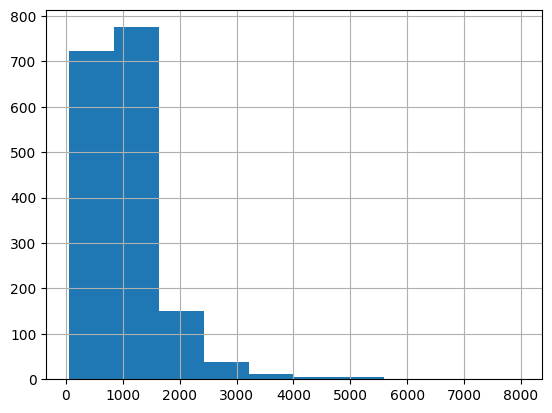

In [ ]:
newsdf['article_word_count'].hist(bins = 10)

<ipython-input-18-29e2caa996f5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "part_of",


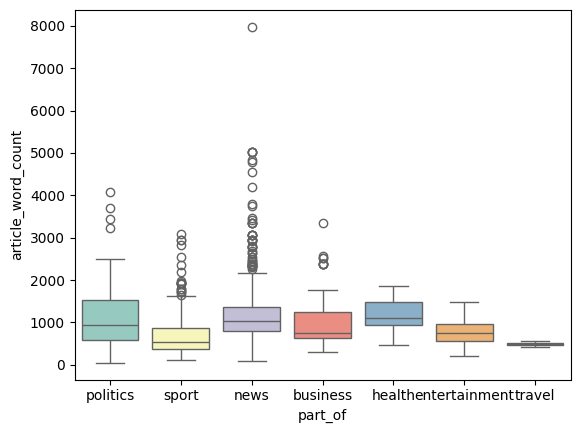

In [ ]:
sns.boxplot(x = "part_of",
            y = "article_word_count",
            palette='Set3',
            data =newsdf);

In [ ]:
#I'm using a function that populates bar graph from a dataframe variable
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    print([word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
# y=range(50) tells plt that the y coords will go from 0 to 50
# width = [iterable] tells plt that the width of the bars will correspond to the frequency counter in word_count_dict
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

# why does there seem to be a double reverse going on

[22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 29, 30, 31, 31, 32, 34, 34, 37, 39, 41, 42, 43, 43, 53, 61, 62, 64, 65, 74, 94, 107, 113, 151, 168, 389, 1556, 1709]


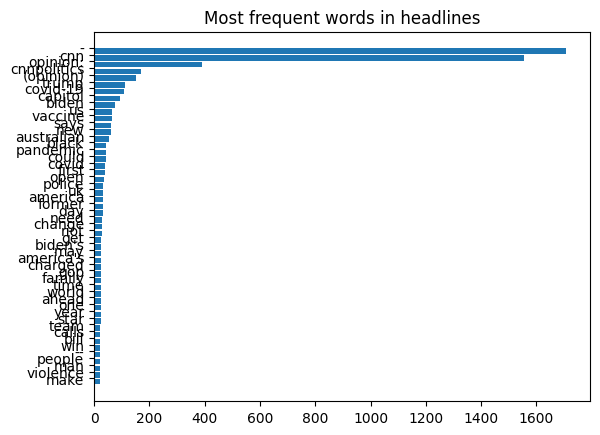

In [ ]:
wordBarGraphFunction(newsdf, 'headline', 'Most frequent words in headlines')

<b>sorted</b>(iterable, /, *, key=None, reverse=False)

Return a new sorted list from the items in <i>iterable</i>.

<i>key specifies a function of one argument that is used to extract a comparison key from each element in <i>iterable</i>. In the above example, the dict.get method is called to make sure we're comparing values and not keys of wc_dict. Without specifying this, we might be comparing alphabetical values.

If <i>reverse<i/> is set to True, the list elements are sorted as if each comparison were reversed.

<b>reversed</b>(seq)
Return a reverse iterator. <i>seq</i> must be an object which has a <u>__reversed__()</u> method or supports the sequence protocol (the <u>__len__()</u> method and the <u>__getitem__()</u> method with integer arguments starting at 0).

<b> In English: reverse an iterable. </b>

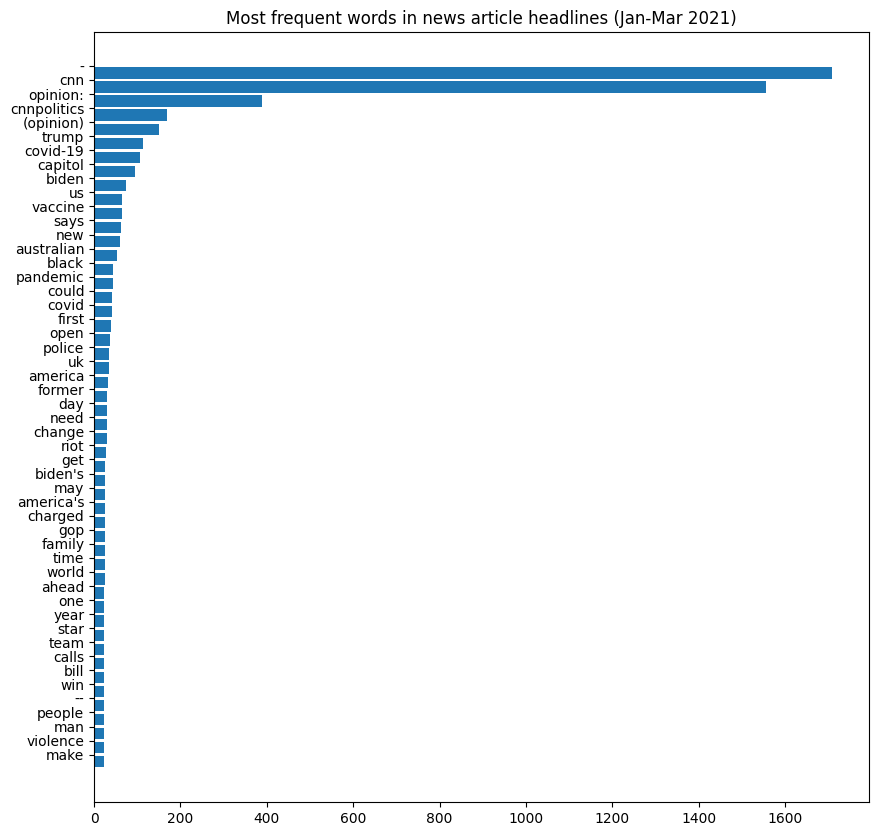

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(newsdf,'headline',"Most frequent words in news article headlines (Jan-Mar 2021)")

We can further explore the articles which are of the longest and shortest lengths

In [ ]:
#shortest
newsdf.sort_values(by='article_word_count').head(10)

,ID,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text,article_word_count
1006,15387,CNN,2021-01-13 01:57:09+00:00,politics,politics,https://www.cnn.com/2021/01/12/politics/pence-...,READ: Mike Pence's letter to Nancy Pelosi sayi...,Vice President Mike Pence wrote in a new lette...,"politics, READ: Mike Pence's letter to Nancy P...",READ: Mike Pence's letter to Nancy Pelosi sayi...,(CNN)Vice President Mike Pence wrote in a new...,48
1008,15389,CNN,2021-01-02 01:49:24+00:00,politics,politics,https://www.cnn.com/2021/01/01/politics/read-g...,READ: Ruling dismissing Gohmert's lawsuit agai...,Federal Judge Jeremy Kernodle on Friday threw ...,"politics, READ: Ruling dismissing Gohmert's la...",READ: Ruling dismissing Gohmert's lawsuit agai...,(CNN)Federal Judge Jeremy Kernodle on Friday ...,48
1005,15386,CNN,2021-01-13 21:46:09+00:00,politics,politics,https://www.cnn.com/2021/01/13/politics/house-...,These 10 House Republicans voted to impeach Tr...,The House of Representatives voted to impeach ...,"politics, These 10 House Republicans voted to ...",These 10 House Republicans voted to impeach Tr...,(CNN)The House of Representatives voted to im...,71
1003,15384,CNN,2021-02-08 23:16:03+00:00,politics,politics,https://www.cnn.com/2021/02/08/politics/trump-...,Read: Former President Donald Trump's January ...,Former President Donald Trump gave a January 6...,"politics, Read: Former President Donald Trump'...",Read: Former President Donald Trump's January ...,(CNN)Former President Donald Trump gave a Jan...,77
150,2828,CNN,2021-02-08 23:16:03+00:00,politics,politics,https://www.cnn.com/2021/02/08/politics/trump-...,Read: Former President Donald Trump's January ...,Former President Donald Trump gave a January 6...,"politics, Read: Former President Donald Trump'...",Read: Former President Donald Trump's January ...,(CNN)Former President Donald Trump gave a Jan...,77
978,14161,"Hira Humayun, CNN",2021-03-08 00:19:38+00:00,news,europe,https://www.cnn.com/2021/03/07/europe/olivier-...,French politician Olivier Dassault dies in hel...,French politician Olivier Dassault has died in...,"europe, French politician Olivier Dassault die...",French politician Olivier Dassault dies in hel...,(CNN)French politician Olivier Dassault has d...,88
1459,41490,"Aleks Klosok and John Sinnott, CNN",2021-02-02 14:23:26+00:00,sport,tennis,https://www.cnn.com/2021/02/02/tennis/roger-fe...,Roger Federer to make tennis comeback in March...,Roger Federer will make his long-awaited retur...,"tennis, Roger Federer to make tennis comeback ...","After over a year out due to injury, Roger Fed...",(CNN)Roger Federer will make his long-awaited...,121
1292,41321,Story by Reuters,2021-02-23 17:51:46+00:00,sport,sport,https://www.cnn.com/2021/02/23/sport/ice-swim-...,David Vencl: Czech free-diver breaks ice-swim ...,Czech free-diver David Vencl swam nearly 81 me...,"sport, David Vencl: Czech free-diver breaks ic...",Czech free-diver breaks ice-swim world record,Czech free-diver David Vencl swam nearly 81 me...,123
1567,41616,"Zahra Ullah and Anna Chernova, CNN",2021-03-16 14:21:05+00:00,sport,sport,https://www.cnn.com/2021/03/16/sport/russia-ho...,Timur Faizutdinov: Russian hockey player dies ...,A 19-year-old Russian hockey player has died a...,"sport, Timur Faizutdinov: Russian hockey playe...","Russian hockey player Timur Faizutdinov, 19, d...",(CNN)A 19-year-old Russian hockey player has ...,127
1004,15385,CNN,2021-01-21 05:03:24+00:00,politics,politics,https://www.cnn.com/2021/01/21/politics/biden-...,READ: President Joe Biden's schedule for his f...,President Joe Biden's first full day in office...,"politics, READ: President Joe Biden's schedule...",READ: President Joe Biden's schedule for his f...,(CNN)President Joe Biden's first full day in ...,134


In [ ]:
#longest
newsdf.sort_values(by='article_word_count', ascending=False).head(10)

,ID,author,date_published,part_of,article_section,url,headline,description,keywords,alternative_headline,text,article_word_count
921,12548,"Nicole Chavez, CNN",2021-01-08 22:47:18+00:00,news,us,https://www.cnn.com/2021/01/08/us/police-respo...,Black Lives Matter and civil rights leaders ar...,After police forced her away from the White Ho...,"us, Black Lives Matter and civil rights leader...",Racial justice leaders are reeling from the 'h...,(CNN)After police forced her away from the Wh...,7977
211,3234,Opinion by Jhodie-Ann Williams and Jane Greenw...,2021-02-06 15:04:20+00:00,news,opinions,https://www.cnn.com/2021/02/06/opinions/covid-...,Opinion: 'Please help' -- 20 stories of Americ...,CNN Opinion asked readers to share their exper...,"opinions, Opinion: 'Please help' -- 20 stories...",Americans are wondering: Will I get the vaccin...,"(CNN)""It's a black hole."" That's how one read...",5024
405,5520,Opinion by Jhodie-Ann Williams and Jane Greenw...,2021-02-06 15:04:20+00:00,news,opinions,https://www.cnn.com/2021/02/06/opinions/covid-...,Opinion: 'Please help' -- 20 stories of Americ...,CNN Opinion asked readers to share their exper...,"opinions, Opinion: 'Please help' -- 20 stories...",Americans are wondering: Will I get the vaccin...,"(CNN)""It's a black hole."" That's how one read...",5024
604,7304,Opinion by Jhodie-Ann Williams and Jane Greenw...,2021-02-06 15:04:20+00:00,news,opinions,https://www.cnn.com/2021/02/06/opinions/covid-...,Opinion: 'Please help' -- 20 stories of Americ...,CNN Opinion asked readers to share their exper...,"opinions, Opinion: 'Please help' -- 20 stories...",Americans are wondering: Will I get the vaccin...,"(CNN)""It's a black hole."" That's how one read...",5024
770,9313,Opinion by Jhodie-Ann Williams and Jane Greenw...,2021-02-06 15:04:20+00:00,news,opinions,https://www.cnn.com/2021/02/06/opinions/covid-...,Opinion: 'Please help' -- 20 stories of Americ...,CNN Opinion asked readers to share their exper...,"opinions, Opinion: 'Please help' -- 20 stories...",Americans are wondering: Will I get the vaccin...,"(CNN)""It's a black hole."" That's how one read...",5024
854,10813,"Thomas Page, CNN",2021-02-23 12:02:13+00:00,news,world,https://www.cnn.com/2021/02/23/world/life-in-a...,'Life in a Day 2020': How Kevin Macdonald turn...,The Oscar-winning filmmaker has carved a caree...,"world, 'Life in a Day 2020': How Kevin Macdona...",'They're braver than I am': How Oscar-winner K...,(CNN)Kevin Macdonald has carved a career out ...,4837
973,14088,"Esha Mitra and Julia Hollingsworth, CNN",2021-02-26 00:14:06+00:00,news,asia,https://www.cnn.com/2021/02/25/asia/india-vacc...,India Covaxin: Some Bhopal slum residents thou...,Experts argue that the experience of some part...,"asia, India Covaxin: Some Bhopal slum resident...",More than a dozen slum residents in an Indian ...,"Bhopal, India (CNN)The white van arrived in sl...",4778
1018,15718,"Sandi Sidhu, Helen Regan, Ivan Watson and Sala...",2021-03-13 00:27:33+00:00,news,asia,https://www.cnn.com/2021/03/12/asia/myanmar-pr...,"Myanmar coup: She was shot dead, her body dug ...","Hours after her family, friends and thousands ...","asia, Myanmar coup: She was shot dead, her bod...","She was shot dead, her body dug up and her gra...","(CNN)Hours after her family, friends and thou...",4553
1019,15719,"Helen Regan, Sandi Sidhu, Paula Hancocks and S...",2021-03-05 08:14:13+00:00,news,asia,https://www.cnn.com/2021/03/05/asia/myanmar-mi...,Myanmar: Increasing evidence that military for...,"Zin Ko Ko Zaw, 22, killed by a bullet to the h...","asia, Myanmar: Increasing evidence that milita...",Increasing evidence that Myanmar's military fo...,"(CNN)Zin Ko Ko Zaw, 22, killed by a bullet to...",4188
477,6063,"Daniel Dale, Holmes Lybrand and Tara Subramani...",2021-02-23 15:02:38+00:00,politics,politics,https://www.cnn.com/2021/02/23/politics/fact-c...,Fact check: Breaking down Joe Biden's first mo...,President Joe Biden was more consistently fact...,"politics, Fact ch

You can then examine the content of individual articles to gain additional insight as needed.

## Word frequencies

Word frequencies (counting how often words occur) is a critical step in quantifying texts for many kinds of text analysis. There are inbuilt functions in Python that can compute words frequencies.

Note that this analysis disregards the word order in the original sentence, taking a bag-of-words approach.


Calculate frequencies to determine the most common words in the corpus

In [ ]:
# converting series to string
article_text = newsdf['text'].to_string()

#create word tokens
tokenized_words=word_tokenize(article_text)

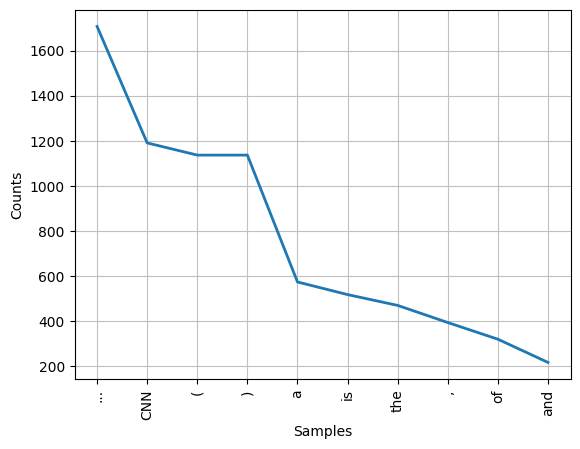

[('...', 1707), ('CNN', 1190), ('(', 1136), (')', 1136), ('a', 573), ('is', 517), ('the', 469), (',', 393), ('of', 319), ('and', 216), ('The', 178), ('in', 171), ("'s", 154), ('has', 128), ('to', 113), ('London', 110), ('.', 84), ('A', 82), ('former', 80), ('who', 74)]


In [ ]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

Create a word cloud to show most common words in the article text.

Note: There are so many ways in which you can customise word clouds for display, check out the documentation and read related blogs posts to try different combinations.

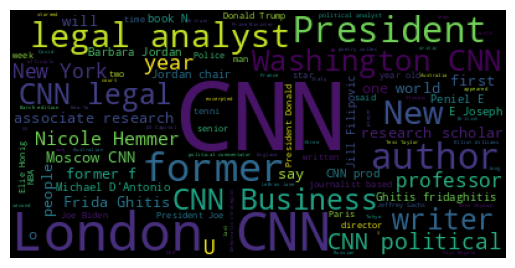

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(article_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

You will notice that the most frequent terms are stopwords and punctuations, let's try recalculating frequencies after performing some basic cleaning.

In [ ]:
# converting article text to lowercase as Python is case-sensitive
article_text_lower = article_text.lower()

#create word tokens
tokenized_words=word_tokenize(article_text_lower)

#Set up stop words for removal
nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")
print(stop_words)
#Add custom stopwords to the list
stop_words.extend(["cnn", "'s", "a", "the"])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Create a new variable to store filtered tokens
filtered_tokens=[]
for w in tokenized_words:
    if w not in stop_words:
         #add all filtered tokens excluding stopwords in this list below
         filtered_tokens.append(w)

import string
# punctuations
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")

#Create another variable to store all clean tokens
filtered_tokens_clean=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_clean.append(i)

Now that we have cleaned the input text, let's calculate frequencies again to view the most common words.

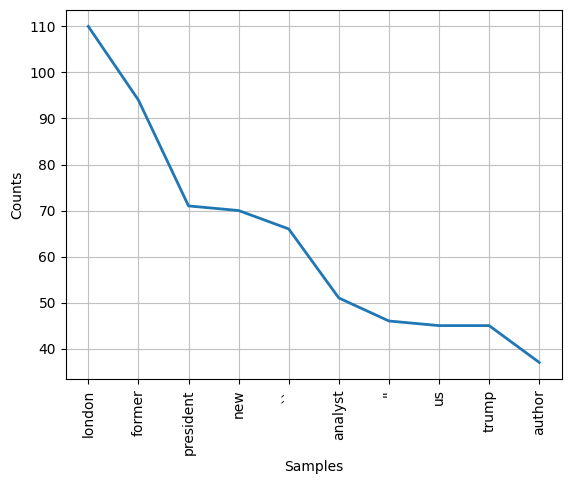

[('london', 110), ('former', 94), ('president', 71), ('new', 70), ('``', 66), ('analyst', 51), ("''", 46), ('us', 45), ('trump', 45), ('author', 37), ('writer', 36), ('journalist', 36), ('legal', 35), ('washington', 34), ('political', 33), ('director', 31), ('business', 29), ('senior', 29), ('professor', 28), ('n', 27)]


In [ ]:
all_words=nltk.FreqDist(filtered_tokens_clean)
all_words.plot(10);
print(all_words.most_common(20))

Exercise: What are the insights from here? What do the key words indicate?